# KNN Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## Prepare Dataset

In [2]:
datasetPath = "../Dataset/balanced-74Attributes-top17_ProtocolName.csv"
df = pd.read_csv(datasetPath)
#df = pd.read_csv(datasetPath, nrows=1000000)
df.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,3232238138,55681,180881158,3128,6,19002242,3,17,6,30.0,...,7352281.0,0.000000,7352281.0,7352281.0,11649832.0,0.000000e+00,11649832.0,11649832.0,131,HTTP_PROXY
1,180881160,3128,3232246304,53107,6,119684671,1006,898,1398550,5388.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,131,HTTP_PROXY
2,3232243804,59584,180881158,3128,6,118953292,24,66,1325,5077.0,...,336393.6,238675.043634,655083.0,172.0,23388871.8,7.972935e+06,29761260.0,12118217.0,131,HTTP_PROXY
3,182845710,53446,180881157,3128,6,59992665,3,3,18,63.0,...,120.0,91.923882,185.0,55.0,29995813.0,2.121108e+07,44994310.0,14997316.0,131,HTTP_PROXY
4,3232254003,21192,180881159,3128,6,1413924,22,0,4622,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,131,HTTP_PROXY


In [3]:
#df.drop(['Source.IP', 'Destination.IP'], axis = 1, inplace = True)
#df.drop(['Source.Port', 'Destination.Port'], axis = 1, inplace = True)

In [4]:
# Encode label for ProtocolName column

encoder = LabelEncoder().fit(df['ProtocolName'])
df['ProtocolName'] = encoder.fit_transform(df['ProtocolName'])

In [5]:
X = df.drop('ProtocolName',axis=1)
Y = df['ProtocolName']

scaler = StandardScaler()
X = scaler.fit_transform(X)


x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

## Train Model

In [6]:
# params = { 'n_neighbors': [3, 5, 7, 11, 21],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan'] }
# gs = GridSearchCV(KNeighborsClassifier(), params, cv = 10, n_jobs = -1)

In [7]:
# %%time
# gs.fit(x_train, y_train)

In [8]:
#%%time
#gs.best_score_

In [9]:
#%%time
#gs.best_params_

In [10]:
#knn = KNeighborsClassifier(n_neighbors = 21, metric='euclidean', weights='uniform')
knn = KNeighborsClassifier(n_neighbors = 3, metric='manhattan', weights='distance')

In [11]:
%load_ext memory_profiler

In [12]:
%%time
%memit knn.fit(x_train, y_train)

peak memory: 658.62 MiB, increment: 0.08 MiB
CPU times: user 93.4 ms, sys: 30.2 ms, total: 124 ms
Wall time: 234 ms


In [13]:
x_test = x_test[:10000]
y_test = y_test[:10000]

In [14]:
%%time
%memit score = knn.score(x_test, y_test)

peak memory: 2675.44 MiB, increment: 2016.64 MiB
CPU times: user 1min 27s, sys: 2.06 s, total: 1min 29s
Wall time: 1min 29s


In [15]:
score

0.807

In [16]:
%%time
%memit y_pred = knn.predict(x_test)

peak memory: 2687.53 MiB, increment: 2028.50 MiB
CPU times: user 1min 47s, sys: 2.48 s, total: 1min 50s
Wall time: 1min 50s


## Results

In [17]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.89      0.92       585
           1       0.97      0.97      0.97       599
           2       0.87      0.91      0.89       569
           3       0.93      0.92      0.93       593
           4       0.67      0.67      0.67       648
           5       0.56      0.54      0.55       595
           6       0.98      0.90      0.94       530
           7       0.69      0.70      0.69       621
           8       0.70      0.71      0.71       590
           9       0.93      0.90      0.92       594
          10       0.89      0.92      0.90       579
          11       0.75      0.80      0.77       600
          12       0.88      0.82      0.85       592
          13       0.71      0.71      0.71       590
          14       0.89      0.93      0.91       572
          15       0.85      0.87      0.86       527
          16       0.59      0.60      0.59       616

    accuracy              

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(accuracy, precision, recall, f1)

0.807 0.8114493894904691 0.8101761167750977 0.8104443523336069


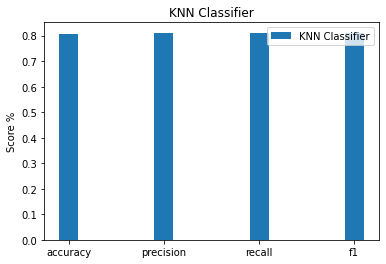

In [19]:
x = ["accuracy", "precision", "recall", "f1"]
scores = [accuracy, precision, recall, f1]

w = 0.2
    
bar1 = np.arange(len(x))
plt.bar(bar1, scores, w, label="KNN Classifier")

plt.gcf().set_size_inches(6, 4)
plt.ylabel("Score %")
plt.title("KNN Classifier")
plt.xticks(bar1, x)
plt.legend()
plt.show()

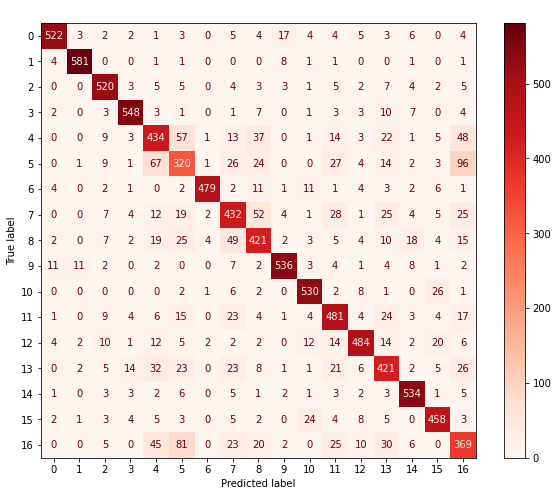

In [20]:
matrix = plot_confusion_matrix(knn, x_test, y_test, cmap=plt.cm.Reds)
#matrix = plot_confusion_matrix(knn, x_test, y_test, normalize='true', cmap=plt.cm.Reds)
matrix.ax_.set_title("Confusion Matrix", color="white")
plt.gcf().set_size_inches(10, 8)
plt.show()

<AxesSubplot:>

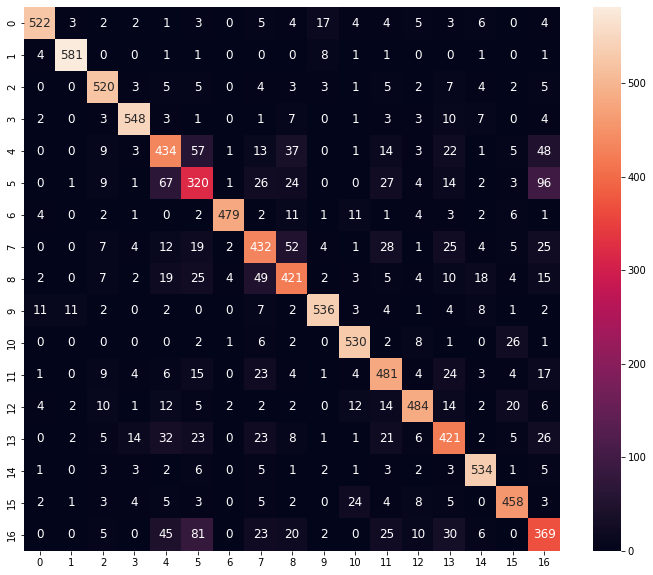

In [21]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(cm, annot=True, ax=ax, fmt='d', annot_kws={"size": 12})